In [5]:
import networkx as nx
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import h5py

Number of nodes: 28
Number of edges: 46


{(0, 21): Text(0.1, 0.8, '0'),
 (0, 1): Text(0.07500000000000001, 0.375, '1'),
 (0, 15): Text(0.125, 0.6499999999999999, '2'),
 (21, 22): Text(0.15000000000000002, 0.925, '3'),
 (22, 20): Text(0.225, 0.8999999999999999, '4'),
 (20, 23): Text(0.35, 0.875, '5'),
 (23, 24): Text(0.7, 0.925, '6'),
 (24, 18): Text(0.875, 0.875, '7'),
 (19, 14): Text(0.4, 0.7250000000000001, '8'),
 (14, 15): Text(0.275, 0.625, '9'),
 (15, 16): Text(0.22499999999999998, 0.6499999999999999, '10'),
 (16, 20): Text(0.275, 0.7749999999999999, '11'),
 (19, 20): Text(0.325, 0.825, '12'),
 (19, 17): Text(0.45, 0.75, '13'),
 (14, 17): Text(0.45, 0.675, '14'),
 (14, 16): Text(0.35, 0.675, '15'),
 (17, 18): Text(0.65, 0.75, '16'),
 (12, 18): Text(0.8, 0.65, '17'),
 (12, 13): Text(0.65, 0.5, '18'),
 (13, 14): Text(0.45, 0.575, '19'),
 (10, 14): Text(0.35, 0.525, '20'),
 (1, 15): Text(0.1, 0.325, '21'),
 (9, 15): Text(0.175, 0.44999999999999996, '22'),
 (1, 9): Text(0.125, 0.175, '23'),
 (1, 2): Text(0.125, 0.1, '24'),
 

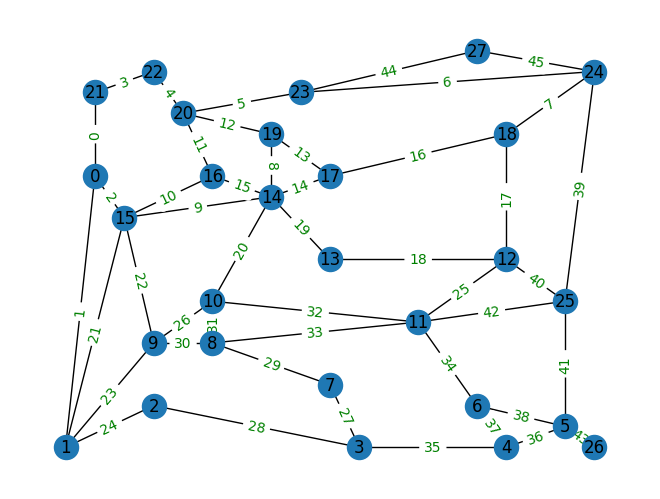

In [6]:
G = nx.Graph()

# Add nodes with custom coordinates
nodes = [(0, {'pos': (0.1, 0.7)}),
         (1, {'pos': (0.05, 0.05)}), 
         (2, {'pos': (0.2, 0.15)}), 
         (3, {'pos': (0.55, 0.05)}),
         (4, {'pos': (0.8, 0.05)}),
         (5, {'pos': (0.9, 0.1)}),
         (6, {'pos': (0.75, 0.15)}),
         (7, {'pos': (0.5, 0.2)}),
         (8, {'pos': (0.3, 0.3)}),
         (9, {'pos': (0.2, 0.3)}),
         (10, {'pos': (0.3, 0.4)}),
         (11, {'pos': (0.65, 0.35)}),
         (12, {'pos': (0.8, 0.5)}),
         (13, {'pos': (0.5, 0.5)}),
         (14, {'pos': (0.4, 0.65)}),
         (15, {'pos': (0.15, 0.6)}),
         (16, {'pos': (0.3, 0.7)}),
         (17, {'pos': (0.5, 0.7)}),
         (18, {'pos': (0.8, 0.8)}),
         (19, {'pos': (0.4, 0.8)}),
         (20, {'pos': (0.25, 0.85)}),
         (21, {'pos': (0.1, 0.9)}),
         (22, {'pos': (0.2, 0.95)}),
         (23, {'pos': (0.45, 0.9)}),
         (24, {'pos': (0.95, 0.95)}),
         (25, {'pos': (0.9, 0.4)}),
         (26, {'pos': (0.95, 0.05)}),
         (27, {'pos': (0.75, 1.0)}),]
G.add_nodes_from(nodes)

edges = [(0, 21), (0, 1), (0, 15), (21, 22), (22, 20), (20, 23), (23, 24), (24, 18), (19, 14), (14, 15), (15, 16), (16, 20), (19, 20), (19, 17), (14, 17), (14, 16), (17, 18), (12, 18), (12, 13), (13, 14), (10, 14), (1, 15), (9, 15), (1, 9), (1, 2), (11, 12), (9, 10), (3, 7), (2, 3), (7, 8), (8, 9), (8, 10), (10, 11), (8, 11), (6, 11), (3, 4), (4, 5), (4, 6), (5, 6), (24, 25), (12, 25), (5, 25), (11, 25), (5, 26), (23, 27), (24, 27)]
# Add an index to each edge in ascending order
indexed_edges = [((start, end), index) for index, (start, end) in enumerate(edges)]
edge_labels = {edge: idx for idx, edge in enumerate(edges)}

# Add edges with index to the graph
for (start, end), index in indexed_edges:
    G.add_edge(start, end, index=index, default_orientation=(start, end))

#G.add_edges_from(edges)
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")
pos = nx.get_node_attributes(G, 'pos')
nx.draw(G, pos, with_labels=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='green')


In [17]:
trajectories = [
    [1, 2, 3, 4, 5, 25, 12, 18, 24],
    [1, 9, 10, 14, 17, 18, 24, 27],
    [0, 21, 22, 20, 16, 14, 13, 12, 25],
    [15, 14, 13, 12, 25, 5, 4, 3],
    [15, 16, 14, 17, 18, 12, 25, 5],
    [21, 22, 20, 16, 14, 13, 12, 25, 5],
    [9, 10, 11, 6, 5, 25, 24, 27],
    [0, 15, 9, 10, 11, 6, 4, 5],
    [27, 23, 20, 16, 15, 9, 1, 2],
    [27, 24, 18, 12, 11, 8, 9, 1],
    [24, 18, 17, 19, 14, 10, 9, 1],
    [23, 20, 19, 14, 10, 11, 6, 4],
    [26, 5, 4, 6, 11, 10, 14, 16, 20],
    [5, 6, 11, 12, 13, 14, 16, 20, 22],
    [4, 3, 7, 8, 9, 15, 0, 21],
    [5, 25, 12, 13, 14, 19, 20, 22],
    [24, 25, 11, 8, 9, 15, 1, 2],
    [24, 25, 5, 4, 3, 7, 8, 9, 1],
    [4, 6, 11, 10, 9, 15, 0, 21, 22],
    [25, 12, 13, 14, 17, 19, 20, 22]
    ]

trajectories_small = [[1, 2, 3, 4, 5, 25, 12, 18, 24], 
                      [24, 18, 17, 19, 14, 10, 9, 1],
                      [26, 5, 4, 6, 11, 10, 14, 16, 20],
                      [4, 3, 7, 8, 9, 15, 0, 21]
                      ]
print(trajectories_small)

def manually_created_trajectories(G, trajectories):
    """_summary_

    Args:
        G (_type_): _description_
        trajectories (_type_): List of node indices
    """
    trajectory_data = []
    if len(trajectories) > 1:
        for trajectory in trajectories:
            edge_idxs = []
            edge_coordinates = []
            edge_orientations = []
            for i in range(len(trajectory) - 1):
                start_node = trajectory[i]
                end_node = trajectory[i + 1]
                edge_idx = G[start_node][end_node]['index']
                edge_idxs.append(edge_idx)
                edge_coordinate = [list(G.nodes[start_node]['pos']), list(G.nodes[end_node]['pos'])]
                edge_coordinates.append(edge_coordinate)
                default_orientation = G.edges[start_node, end_node]['default_orientation']

                # Determine the orientation based on the traversal direction
                if (start_node, end_node) == default_orientation:
                    edge_orientations.append(1)
                else:
                    edge_orientations.append(-1)
            
            trajectory_data.append({'edge_idxs': edge_idxs, 
                                    'edge_coordinates': edge_coordinates, 
                                    'edge_orientations': edge_orientations})
    
    file_path = '/ceph/hdd/students/schmitj/MA_Diffusion_based_trajectory_prediction/data/synthetic_4_traj.h5'
    with h5py.File(file_path, 'w') as f:
        for i, trajectory in enumerate(trajectory_data):
            grp = f.create_group(f'trajectory_{i}')
            grp.create_dataset('edge_idxs', data=trajectory['edge_idxs'])
            grp.create_dataset('edge_coordinates', data=trajectory['edge_coordinates'])
            grp.create_dataset('edge_orientations', data=trajectory['edge_orientations'])
            
manually_created_trajectories(G, trajectories_small)

[[1, 2, 3, 4, 5, 25, 12, 18, 24], [24, 18, 17, 19, 14, 10, 9, 1], [26, 5, 4, 6, 11, 10, 14, 16, 20], [4, 3, 7, 8, 9, 15, 0, 21]]


In [15]:
def calculate_angle(G, node1, node2, node3):
    """Calculate the angle between three nodes."""
    pos1 = np.array(G.nodes[node1]['pos'])
    pos2 = np.array(G.nodes[node2]['pos'])
    pos3 = np.array(G.nodes[node3]['pos'])

    vector1 = pos2 - pos1
    vector2 = pos3 - pos2
    cosine_angle = np.dot(vector1, vector2) / (np.linalg.norm(vector1) * np.linalg.norm(vector2))
    angle = np.arccos(cosine_angle)

    return np.degrees(angle)

def generate_realistic_trajectories(G, num_trajectories, min_length, max_length, shortest_path_prob, sharp_turn_angle, seed=1):
    random.seed(seed)
    trajectories = []

    # Calculate all pairwise shortest paths
    shortest_paths = dict(nx.all_pairs_shortest_path_length(G))

    for _ in range(num_trajectories):
        # Choose a random start node
        start_node = random.choice(list(G.nodes()))

        # Find eligible end nodes for the start node
        eligible_end_nodes = [node for node, path_length in shortest_paths[start_node].items() if path_length >= 5]
        
        # Refine eligible nodes: Only choose end nodes relatively far away from start nodes
        # --> This is a simple heuristic to ensure that the generated paths do not take completely unreasonable routes for short distances
        start_node_pos = pos[start_node]
        eligible_end_nodes = [node for node in eligible_end_nodes if np.abs(pos[node][0] - start_node_pos[0]) >= 0.5 or np.abs(pos[node][1] - start_node_pos[1]) >= 0.5]
        
        if len(eligible_end_nodes) > 0:
            end_node = random.choice(eligible_end_nodes)
        else:
            continue

        # Generate a random path
        path_length = random.randint(min_length, max_length)
        path = [start_node]
        sharp_turns = 0

        for _ in range(path_length - 1):
            current_node = path[-1]
            neighbors = list(G.neighbors(current_node))

            # Check if we are allowed to take the shortest path
            if random.random() < shortest_path_prob:
                # Choose the neighbor that leads to the end node if available
                    eligible_neighbors = [neighbor for neighbor in neighbors if neighbor not in path]
                    if eligible_neighbors:
                        neighbor = min(eligible_neighbors, key=lambda x: shortest_paths[x][end_node])
                    else:
                        neighbor = random.choice(neighbors)
            else:
                # Choose a random neighbor that is not already in the path
                eligible_neighbors = [neighbor for neighbor in neighbors if neighbor not in path]
                if eligible_neighbors:
                    neighbor = random.choice(eligible_neighbors)
                else:
                    continue
            
            # Check angle to avoid sharp turns
            if len(path) > 1 and calculate_angle(G, path[-2], current_node, neighbor) < sharp_turn_angle:
                sharp_turns += 1
            
            # Apply the sharp turn rule
            if sharp_turns > (len(path) / 4):
                break  # Too many sharp turns, break the loop
            
            path.append(neighbor)
        
        if len(path) > 7:
            trajectories.append(path)

    return trajectories

In [11]:
import h5py
num_trajectories = 200
min_length = 8
max_length = 10
shortest_path_prob = 0.2  # Probability of choosing the shortest path

trajectories = generate_realistic_trajectories(G, num_trajectories, min_length, max_length, shortest_path_prob, sharp_turn_angle=30)
print(len(trajectories))
# trajectories = generate_edge_data_with_orientation(G, trajectories)
# Print the generated trajectories
for idx, traj in enumerate(trajectories):
    print(f"Trajectory {idx + 1}: {traj}")
trajectory_data = []
for trajectory in trajectories:
    edge_idxs = []
    edge_coordinates = []
    edge_orientations = []
    for i in range(len(trajectory) - 1):
        start_node = trajectory[i]
        end_node = trajectory[i + 1]
        edge_idx = G[start_node][end_node]['index']
        edge_idxs.append(edge_idx)
        edge_coordinate = [list(G.nodes[start_node]['pos']), list(G.nodes[end_node]['pos'])]
        edge_coordinates.append(edge_coordinate)
        default_orientation = G.edges[start_node, end_node]['default_orientation']

        # Determine the orientation based on the traversal direction
        if (start_node, end_node) == default_orientation:
            edge_orientations.append(1)
        else:
            edge_orientations.append(-1)
        
        
        '''edge_orientation = 1 if (start_node, end_node) in G.edges() else -1
        if edge_orientation == -1:
            print('Hello')
        edge_orientations.append(edge_orientation)'''
    trajectory_data.append({'edge_idxs': edge_idxs, 
                            'edge_coordinates': edge_coordinates, 
                            'edge_orientations': edge_orientations})

# Save trajectories to HDF5 file
file_path = '/ceph/hdd/students/schmitj/MA_Diffusion_based_trajectory_prediction/data/synthetic.h5'
with h5py.File(file_path, 'w') as f:
    for i, trajectory in enumerate(trajectory_data):
        grp = f.create_group(f'trajectory_{i}')
        grp.create_dataset('edge_idxs', data=trajectory['edge_idxs'])
        grp.create_dataset('edge_coordinates', data=trajectory['edge_coordinates'])
        grp.create_dataset('edge_orientations', data=trajectory['edge_orientations'])

8
Trajectory 1: [1, 15, 16, 20, 19, 17, 18, 12]
Trajectory 2: [25, 5, 6, 4, 3, 2, 1, 15, 16, 14]
Trajectory 3: [14, 13, 12, 11, 8, 10, 9, 1, 0, 15]
Trajectory 4: [8, 7, 3, 2, 1, 0, 21, 22]
Trajectory 5: [0, 15, 1, 9, 10, 11, 12, 25, 24]
Trajectory 6: [8, 9, 15, 16, 20, 22, 21, 0, 1, 2]
Trajectory 7: [3, 2, 1, 15, 0, 21, 22, 20, 16, 14]
Trajectory 8: [6, 11, 25, 5, 4, 3, 7, 8, 9]


In [7]:
def plot_graph_with_trajectories(G, trajectories):
    # Draw the graph
    pos = nx.get_node_attributes(G, 'pos')
    nx.draw(G, pos, with_labels=True, node_size=300, node_color='skyblue', font_size=10, font_weight='bold')

    # Plot each trajectory
    for traj in trajectories:
        edges = [(traj[i], traj[i+1]) for i in range(len(traj)-1)]
        nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color='red', width=2)

    plt.title("Graph with Simulated Trajectories")
    plt.show()

# Choose a subset of trajectories to visualize (e.g., first 5)
trajectories_to_visualize = trajectories[:1]

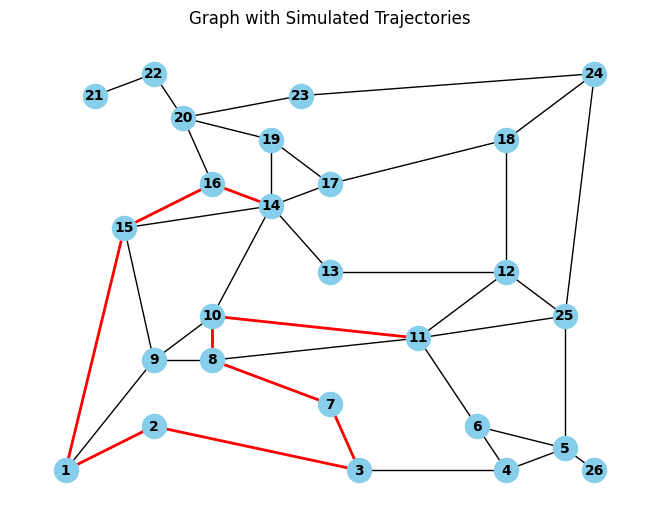

In [8]:
plot_graph_with_trajectories(G, trajectories[:1])